In [2]:
# Starts the autoreload extension, which allows editing the .py files with the notebook running and automatically imports the latest changes

%load_ext autoreload
%autoreload 2

import trim_duplicates, model, network, gradcam, plots
from dataset import Dataset
import jax.numpy as jnp
import numpy as np
import jax
import sklearn
import wandb
from trim_duplicates import DuplicatesData
import matplotlib.pyplot as plt

#assert jax.local_device_count() >= 8

NUM_CLASSES = 4
SEED = 14
BATCH_SIZE = 128

def basemodel_process(x): return x

I0000 00:00:1654026154.580405  696363 tpu_initializer_helper.cc:116] libtpu.so is already in use by process with pid 694704. Not attempting to load libtpu.so in this process.
/home/joao/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
#rng = jax.random.PRNGKey(SEED)
#rng = jax.random.split(jax.random.PRNGKey(1))[0]
#dataset_mendeley = Dataset.load("mendeley", rng=rng, official_split=True)
#dataset_tawsifur = Dataset.load("tawsifur", rng=rng, official_split=True)
#dataset_covidx = Dataset.load("covidx", rng=rng, official_split=True)
# dataset_merged = Dataset.load("mendeley_covidx", rng=rng, official_split=True)

In [ ]:
"""
def report_dups(title, count, ds):
    print(title + ":", count, "(" + str(round(count / ds.x_all.shape[0] * 1000)/10) + "%)")

def is_dup(indices, i, dont_count):
    for v in indices:
        if len(v) > 1 and i not in dont_count and i in v:
            for j in v:
                if j != i:
                    dont_count[j] = True
            return True
    return False

def count_dups(groups, ds):
    dont_count = {}
    dups_count = 0

    for i in range(ds.x_all.shape[0]):
        if is_dup(groups, i, dont_count):
            dups_count += 1
    
    return dups_count

def show_diff(ds, global_set, max_rows=4):
    actual_name = ds.name.split("/")[-1]
    dups = DuplicatesData.load("dup_data/cv_" + actual_name + "_0.pickle")
    dups_pix = DuplicatesData.load("dup_data/" + actual_name + "_pix.pickle")

    assert global_set == "embed" or global_set == "pix"

    if global_set == "embed":
        global_set = dups.indices
        other_set = dups_pix.indices
    else:
        global_set = dups_pix.indices
        other_set = dups.indices
    
    diff = global_set - dups.indices.intersection(dups_pix.indices)
    
    total_dups_two_sets = 0
    dont_count = {}

    for i in range(ds.x_all.shape[0]):       
        if is_dup(dups, i, dont_count) and is_dup(dups_pix, i, dont_count):
            total_dups_two_sets += 1

    report_dups("Total pix dups", count_dups(dups_pix.indices, ds), ds)
    report_dups("Total embed dups", count_dups(dups.indices, ds), ds)
    # report_dups("Intersection", total_dups_two_sets, ds)

    #assert jnp.all(ds.rng == dups.rng) and jnp.all(ds.rng == dups_pix.rng)

    other_dups_map = {}
    for group in other_set:
        if len(group) > 1:
            for i in group:
                other_dups_map[i] = True
        
    imgs = []
    for v in diff:
        imgs.append([])
        if len(v) > 1:
            for i in v:
                print(i, ds.paths_all[i])
                imgs[len(imgs)-1].append({ "img": ds.x_all[i,:,:,:], "color": "red" if i not in other_dups_map else "black" })
    
    plots.compare_n_images(imgs, rows=max_rows)

show_diff(dataset_mendeley, "embed")

### COUNTS DUPS INTERSECTION ACROSS CROSS VALIDATION SETS ###

actual_name = "tawsifur"
ds = dataset_tawsifur

cvs = []
for i in range(5):
    cvs.append(DuplicatesData.load("dup_data/cv_" + actual_name + "_" + str(i) + ".pickle"))
cvs.append(DuplicatesData.load("dup_data/" + actual_name + "_pix.pickle"))

dups_in_all = 0
dont_count = {}

for i in range(ds.x_all.shape[0]):   
    in_all = True
    for cv in range(len(cvs)):
        if not is_dup(cvs[cv].indices, i, dont_count):
            in_all = False
            break
    
    if in_all:
        dups_in_all += 1

report_dups("INTERSECAO DE TODOS CV E DOS EMBEDDINGS", dups_in_all, ds)"""

In [ ]:
"""
def custom_show_diff(ds, global_set, max_rows=4):
    actual_name = ds.name.split("/")[-1]
    dups = DuplicatesData.load("dup_data/" + actual_name + "_custom.pickle")
    dups_pix = DuplicatesData.load("dup_data/" + actual_name + "_pix.pickle")

    assert global_set == "embed" or global_set == "pix"

    if global_set == "embed":
        global_set = dups.indices
        other_set = dups_pix.indices
    else:
        global_set = dups_pix.indices
        other_set = dups.indices
    
    diff = global_set - dups.indices.intersection(dups_pix.indices)
    
    print("Total embed dups:", len(dups.indices))
    print("Total pix dups:", len(dups_pix.indices))
    print("Complement of difference:", len(diff))
    
    #assert jnp.all(ds.rng == dups.rng) and jnp.all(ds.rng == dups_pix.rng)

    other_dups_map = {}
    for group in other_set:
        if len(group) > 1:
            for i in group:
                other_dups_map[i] = True
        
    imgs = []
    for v in diff:
        imgs.append([])
        if len(v) > 1:
            for i in v:
                print(i, ds.paths_all[i])
                imgs[len(imgs)-1].append({ "img": ds.x_all[i,:,:,:], "color": "red" if i not in other_dups_map else "black" })
    
    plots.compare_n_images(imgs, rows=max_rows)

custom_show_diff(dataset_mendeley, "embed")"""

Total pix dups: 20929


/home/joao/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


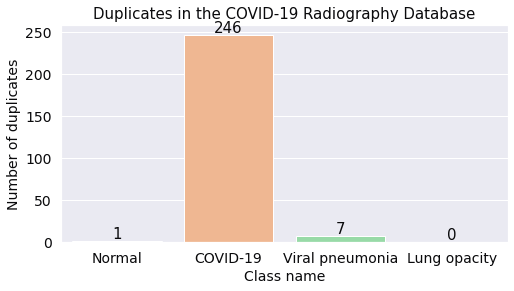

In [6]:
import seaborn as sns
import pickle
import visuals

# Duplicates per class
# Mendeley and tawsifur

ds_name = "tawsifur"
rng = jax.random.PRNGKey(SEED)
rng = jax.random.split(jax.random.PRNGKey(1))[0]

with open(ds_name + "/metadata.pickle", "rb") as f:
    meta = pickle.load(f)

y_all = np.load(ds_name + "/y.npy")
ids = jnp.arange(0, y_all.shape[0])
ids = jax.random.permutation(rng, ids)
y_all = y_all[ids]

dups_pix = DuplicatesData.load("dup_data/" + ds_name + "_pix.pickle")
print("Total pix dups:", len(dups_pix.indices))

for d in dups_pix.indices:
    x = np.asarray(d)
    assert np.all(y_all[x] == y_all[x[0]])

dups_per_class = [0] * np.unique(y_all).shape[0]

for d in dups_pix.indices:
    if len(d) > 1:
        cls = int(y_all[d[0]])
        dups_per_class[cls] += len(d) - 1

plt.rcParams['figure.figsize'] = (8,4)
dups_per_class = np.asarray(dups_per_class)
splot = sns.barplot(meta['classnames'], dups_per_class)
plt.xlabel("Class name")
plt.ylabel("Number of duplicates")
plt.title("Duplicates in the COVID-19 Radiography Database", size=15)
plt.bar_label(splot.containers[0], size=15, fontfamily="Linux Libertine Display")
plt.show()

Total pix dups: 30146


/home/joao/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


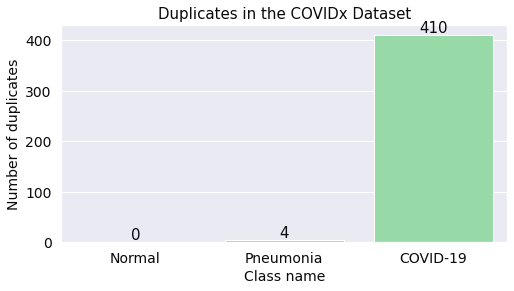

In [8]:
import seaborn as sns
import pickle
import visuals

# Duplicates per class
# COVIDx

ds_name = "covidx"
rng = jax.random.PRNGKey(SEED)
rng = jax.random.split(jax.random.PRNGKey(1))[0]

with open(ds_name + "/metadata.pickle", "rb") as f:
    meta = pickle.load(f)

y_train = np.load(ds_name +'/y_train.npy')
y_test = np.load(ds_name +'/y_test.npy')
ids = jnp.arange(0, y_train.shape[0])
ids = jax.random.permutation(rng, ids)
y_train = y_train[ids]

ids = jnp.arange(0, y_test.shape[0])
ids = jax.random.permutation(rng, ids)
y_test = y_test[ids]

y_all = np.concatenate([y_test, y_train])

dups_pix = DuplicatesData.load("dup_data/" + ds_name + "_pix.pickle")
print("Total pix dups:", len(dups_pix.indices))

for d in dups_pix.indices:
    x = np.asarray(d)
    assert np.all(y_all[x] == y_all[x[0]])
    
dups_per_class = [0] * np.unique(y_all).shape[0]

for d in dups_pix.indices:
    if len(d) > 1:
        cls = int(y_all[d[0]])
        dups_per_class[cls] += len(d) - 1

plt.rcParams['figure.figsize'] = (8,4)
dups_per_class = np.asarray(dups_per_class)
splot = sns.barplot(meta['classnames'], dups_per_class)
plt.xlabel("Class name")
plt.ylabel("Number of duplicates")
plt.title("Duplicates in the COVIDx Dataset", size=15)
plt.bar_label(splot.containers[0], size=15, fontfamily="Linux Libertine Display")
plt.show()

In [ ]:
dups_per_class = np.asarray(dups_per_class)
splot = sns.barplot(meta['classnames'], dups_per_class)
plt.xlabel("Class name", size=16)
plt.ylabel("Number of duplicates", size=16)
plt.show()

In [ ]:
ds = dataset_merged

In [ ]:
import pickle

with open('dup_data/mendeley_covidx_pix.pickle', 'rb') as f:
    dups = pickle.load(f)

In [ ]:
dups = list(dups.indices)

In [ ]:
dups = list(filter(lambda l: len(l) > 1,dups))

In [ ]:
def plot_dups(idxs):
    
    for i, idx in enumerate(idxs):
        plt.subplot(1, len(idxs), i+1)
        plt.imshow(ds.x_all[idx])
        print(ds.paths_all[idx])
    plt.title(ds.y_all[idxs[0]])
    
    plt.show()

from tqdm import tqdm
for group in dups:
    labels = ds.y_all[np.array(group)].argmax(1)
    if labels.std() != 0:
        print('deu ruim')
    #plot_dups(group)
        

In [ ]:
ds.y_all[np.concatenate(dups)].sum(0)